# Implementing and Training Linear Regression Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sklearn
from IPython.display import HTML, Image, display

In [2]:
# some defaults for making plots look nicer
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

%matplotlib inline

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Functions taken from RICE's COMP540 class
def make_surface_plot(X, Y, Z, xlabel, ylabel):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.jet)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

def make_contour_plot(X, Y, Z, levels, xlabel, ylabel, theta):
    fig, ax = plt.subplots()
    CS = plt.contour(X, Y, Z, levels = levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(theta[0],theta[1], 'ro')

# Linear Regression

## Data (X) and Ground Truth (Y)

(100, 1) (100, 1)


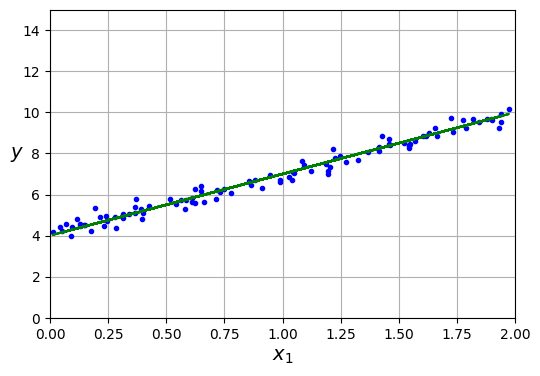

In [4]:
#GENERATE and VISUALIZE THE DATA
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m,1)  # sample uniformly from [0,2] getting m samples

#GROUND TRUTH, UNKNOWN IN PRACTICE
y = 4 + 3 * X + 0.3 * np.random.randn(m,1)  # compute y from model with noise from 0.3 * zero-mean, unit var Gaussian
#Higher Noise = more-disperese/less-grouped the dots are
print(X.shape,y.shape)

# visualize the data
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")

# plot the ground truth line
plt.plot(np.sort(X),4 + 3*np.sort(X),'g')

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()


## Linear Regression Types:
* With Loss Function
* With Normal Equation

### With a Loss Function Perspective

EXPLANATION

Calculate the MSE (mean-squared error (MSE)) loss function over a grid of intercept and slope values.

> (THIS APPLIES TO 2 FEATURES, WHEN USING n FEATURES, WE WOULD HAVE a grid of n-1 INTERCEPTS and a SLOPE)
e.g. The true underlying function that generated the data above is "y = 4 + 3x". 4 is the true intercept and 3 is the true slope.

However, when fitting a linear model, we dont know these true values Therefore, search over many possible (b,m) pairs to find the pair that minimizes the MSE.

The  code below simulates multiple  different models where different b,m values were selected. Then each candidate model gets evaluated by computing how far its predictions $\hat{y} = b + mx$ are from the true outputs y, via the MSE.

In [5]:
#IMAGINE MODELS THAT WILL CHOOSE AMONG THESE intercept and slope values.
intercept_vals = np.linspace(2.0,6.0, 500)
slope_vals = np.linspace(1.0,5.0, 500)

Create two 2d meshs, one for x values and another for y values (since we want a 3d plane we use 2 2D meshs). This ensures that instead of slope and intercept 1on1 pairs we have each slope value with each intercept value. For each intercept slope pair a loss value gets calculated.

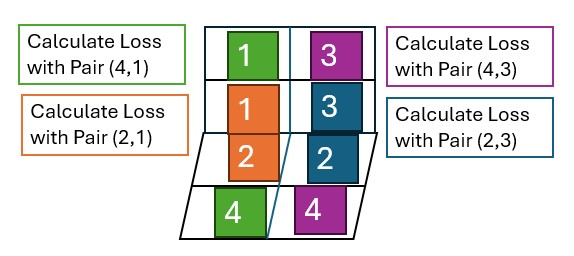

In [7]:
display(Image(filename='Double_grid_explanation.jpg'))

In [8]:
intercepts, slopes = np.meshgrid(intercept_vals, slope_vals)

In [9]:
intercept_vals.shape, slope_vals.shape, intercepts.shape, slopes.shape

((500,), (500,), (500, 500), (500, 500))

In [10]:
T = np.c_[intercepts.ravel(), slopes.ravel()] #this gives you 500*500 pairs

In [11]:
T.shape

(250000, 2)

In [12]:
# TRAINING DATA:
X_train = np.array([[1, 1], [1, -1], [1, 0.5]]) #Training values
y_train = 4 * X_train[:, :1] + 3 * X_train[:, 1:] #True y values/labels

In [13]:
X_train.shape, y_train.shape

((3, 2), (3, 1))

In [14]:
#Calculate the MSE which is the height related to every single possible training data, the lowest value will be the true values of [b, m].
#This line gets the loss value of each pair in T (of the 500x500) when applied to all the samples of X
J = (1 / len(X_train) * ((T @ X_train.T - y_train.T) ** 2).sum(axis=1)).reshape(intercepts.shape)

In [15]:
J.shape

(500, 500)

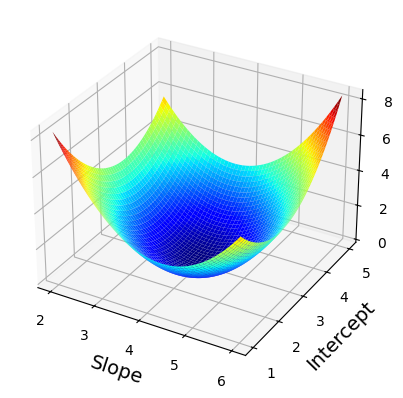

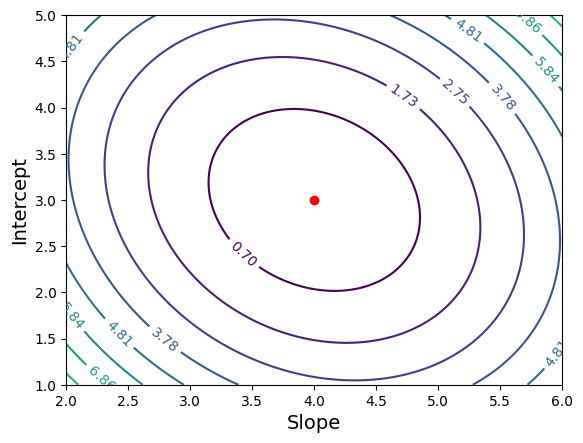

In [16]:
make_surface_plot(intercepts, slopes, J, 'Slope', 'Intercept')
make_contour_plot(intercepts, slopes, J, np.linspace(0.7,12,12), 'Slope', 'Intercept',[4,3])
plt.show()

### With the Normal Equation
- use the normal equation to recover the intercept and slope parameters of the model from the data

**THIS IS COMPUTATIONALLY COSTLY WHEN # FEATURES/DIMENSIONS INCREASE**`

In [17]:
# np.random.seed(42)  # to make this code example reproducible
# m = 100  # number of instances
# X = 2 * np.random.rand(m,1)  # sample uniformly from [0,2] getting m samples
# y = 4 + 3 * X + 0.5 * np.random.randn(m,1)  # compute y from model with noise from 0.3 * zero-mean, unit var Gaussian
# print(X.shape, y.shape)

In [18]:
# prepare data for normal equation: add a column of 1s to X to recover intercept parameter
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance as bias/intercept term

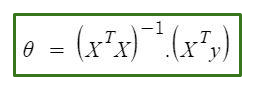

In [19]:
display(Image(filename='RL_normal_equation.png'))

In [20]:
# calculate optimal theta using (Xb.T Xb)^{-1} Xb.T y
# @ stands for matrix multiplication or dot product
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print('Estimated theta = ',theta_best)
print('True theta = [[4],[3]]')

Estimated theta =  [[4.06452885]
 [2.93103402]]
True theta = [[4],[3]]


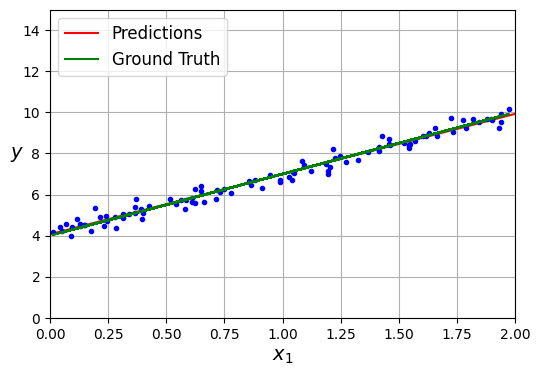

In [21]:
# plot predictions on new data (x=0 and x=2) -- endpoints of our domain
Xnew = np.array([[0],[2]])
Xnew_b = add_dummy_feature(Xnew)
ypred = Xnew_b @ theta_best


# plotting
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(Xnew, ypred, "r-", label="Predictions")

# show training data
plt.plot(X, y, "b.")

# plot the ground truth line
plt.plot(np.sort(X), 4 + 3 * np.sort(X),'g',label='Ground Truth')


# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

## Linear Regression Coding Styles:
* Sklearn
* Pytorch
  * Batch Gradient Descent
  * Stochastic Gradient Descent
  * Mini-Batch Gradient Descent

### Sklearn

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
print("Intercept = ", model.intercept_, "Coefficients = ", model.coef_)

Intercept =  [4.06452885] Coefficients =  [[2.93103402]]


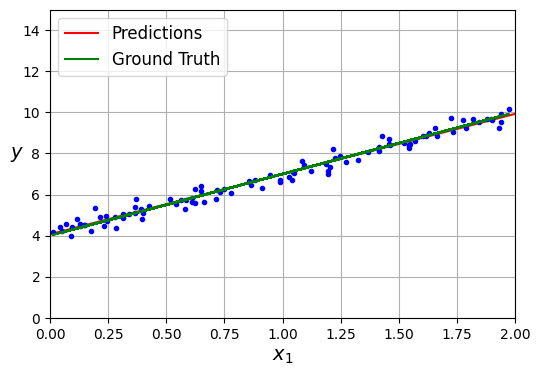

In [23]:
# plot predictions on new data (x=0 and x=2) -- endpoints of our domain
Xnew = np.array([[0],[2]])
ypred = model.predict(Xnew)

# plotting
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(Xnew, ypred, "r-", label="Predictions")

# show training data
plt.plot(X, y, "b.")

# plot the ground truth line
plt.plot(np.sort(X),4 + 3*np.sort(X),'g', label='Ground Truth')

# extra code – beautifies and saves Figure 4–2
# add annotations
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

### Pytorch

#### Batch Gradient Descent
1. augment data matrix X with a column of 1s.
2. set learning rate eta, n_epochs.

In [50]:
lr = 0.04 # learning rate
n_epochs = 100
m = len(X_b) # number of examples

* **LARGER LRs shoot out and oscilate values trying to get the minimization.**
* **Smaller LRs need more iterations/epochs/updates to get to the minimum.**

   3. initialize parameter vector theta (intercept and coefficients) to small random numbers.

In [51]:
#Initilaize thetas randomly
np.random.seed(42)
theta = 0.01 * np.random.randn(X_b.shape[1],1)

#Store losses for plotting
losses = []
#list track the evolution of the parameters 𝜃 during training so you can visualize or analyze how gradient descent converges step by step.
theta_path = [theta]

4. for epoch in range(n_epochs)
      - compute gradient of theta wrt squared error loss function
      - update theta: theta <- theta - eta * gradient

In [52]:
for epoch in range(n_epochs): #Iteration that goes through all the data
    loss = 1/m * (X_b @ theta - y).T @ (X_b @ theta - y) #Loss function standard version
    gradient = 2/m * X_b.T @ (X_b @ theta - y) #Derivative of Loss function on theta
    theta = theta - lr * gradient #Theta update

    losses.append(np.squeeze(loss)) # turn them from (m,1) to just m. (m, 1) = (m, d)(d, 1)
    theta_path.append(theta) #Add the updated thetas per each epoch/iteration through all data

theta_path = np.array(theta_path) #Turn this into an array

print('theta = ', theta) #Plot the predicted thetas

theta =  [[3.85394013]
 [3.11697232]]


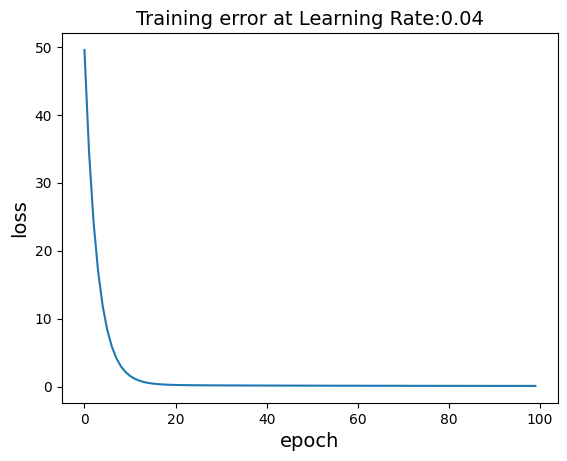

In [53]:
plt.figure()
plt.plot(np.arange(n_epochs),losses)
plt.title(f'Training error at Learning Rate:{lr}')
plt.ylabel('loss')
plt.xlabel('epoch');

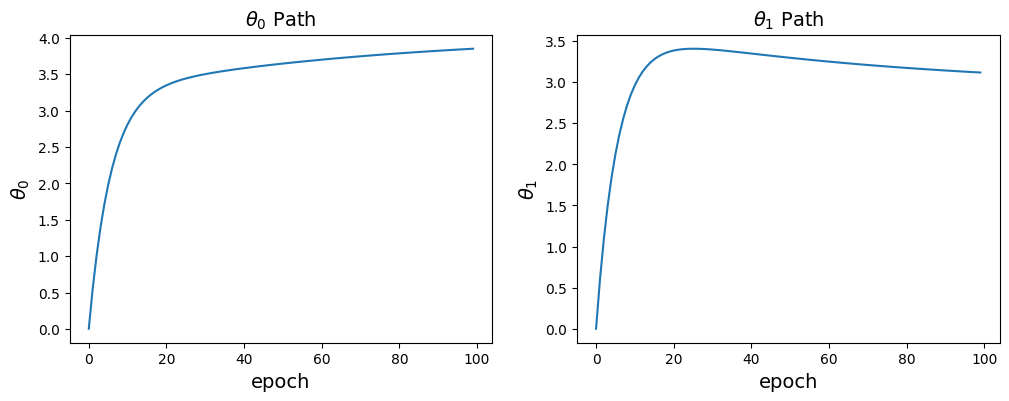

In [54]:
#Plot the Theta changes for each LR
fig, (axs0, axs1) = plt.subplots(1, 2, figsize=(12, 4))
#Plots for Theta 0
axs0.plot(np.arange(n_epochs), np.squeeze(theta_path)[:-1, 0])
axs0.set_title(r'$\theta_0$' + ' Path')
axs0.set_ylabel(r'$\theta_0$')
axs0.set_xlabel('epoch')
#Plot for Theta 1
axs1.plot(np.arange(n_epochs), np.squeeze(theta_path)[:-1, 1])
axs1.set_title(r'$\theta_1$' + ' Path')
axs1.set_ylabel(r'$\theta_1$')
axs1.set_xlabel('epoch')
#Show both
plt.show()

#### Stochastic Gradient Descent
> Using a LR/Alpha schedule. MORE ON LR schedules later on



1. select n_epochs, and t0, t1 (learning schedule hyperparameters)

In [29]:
def learning_schedule(t):
  """
  Time-based function to get alpha change smoothly as iterations happen, this is just one of the ways to do so, like:
  step decay: alpha *= drop rate ^ (t/#_epochs_to_drop)
  exponential decay: alpha *= exp(-kt)
  Adaptative methods like ADAM or RMSprop

  Input t = epoch*m + i
    m = number of examples in X
    i = iteration in the data sample of the epoch

  Output = LR or alpha
  """
  return t0 / (t + t1)

n_epochs = 10
t0, t1 = 5, 50  # learning schedule hyperparameters

2. augment data matrix X with a column of 1s (m = number of examples in X)

In [30]:
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance

3. initialize parameter vector theta (intercept and coefficients) to small random numbers.

In [42]:
np.random.seed(42)
theta = 0.01 * np.random.randn(X_b.shape[1], 1)  # random initialization
theta_path_sgd = [theta] #To keep track of thetas as they change

4. Loop
- for epoch in range(n_epochs)
  - for iter in range(m)
    - select a random element i in [0,m-1] and get X[i] and y[i]
    - compute gradient of theta wrt squared error loss function on X[i],y[i]
    - update alpha: learning_schedule(epoch*m + iter)           
    - update theta: theta <- theta - eta * gradient

In [43]:
#Store losses for plotting
losses = []
thetas_per_epoch = []
lrs = [] #We are using a different LR per sample/batch, this is to visualize the average LR

#Start Training
for epoch in range(n_epochs): #for each full data check / AKA epoch
    alphas = []
    for iter in range(X_b.shape[0]):  #For each training sample in the epoch (this case all of them)
        ridx = np.random.randint(X_b.shape[0]) #randomly choose a training sample with replacement (unbiased but noisy)
        xi = X_b[ridx : ridx + 1,:]
        yi = y[ridx : ridx + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m since we are not considering all samples, just the ith sample
        alpha = learning_schedule(epoch * m + iter) #calculate learning rates
        alphas.append(alpha)
        theta = theta - alpha * gradients #update thetas
        theta_path_sgd.append(theta)  #append theta history into the record list

    lrs.append(np.mean(alphas))
    thetas_per_epoch.append(theta) #append theta history into the record list
    loss = ((X_b @ theta - y) ** 2).mean() #Loss function standard version
    losses.append(float(loss)) #append loss history into the record list

theta_path_sgd = np.array(theta_path_sgd) #turn into np arraay

print("Theta using SGD = ", theta)

Theta using SGD =  [[4.05693532]
 [2.93935393]]


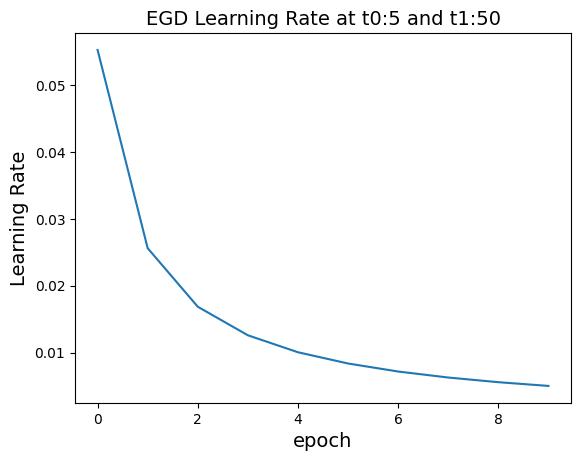

In [46]:
plt.figure()
plt.plot(np.arange(n_epochs), lrs)
plt.title(f'EGD Average Learning Rate at t0:{t0} and t1:{t1}')
plt.ylabel('Learning Rate')
plt.xlabel('epoch');

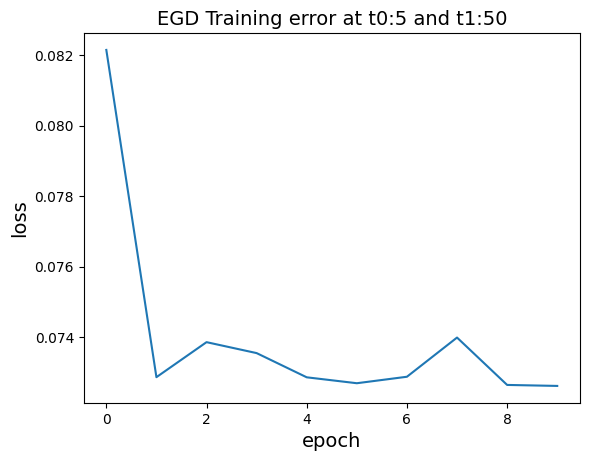

In [47]:
plt.figure()
plt.plot(np.arange(n_epochs), losses)
plt.title(f'EGD Training error at t0:{t0} and t1:{t1}')
plt.ylabel('loss')
plt.xlabel('epoch');

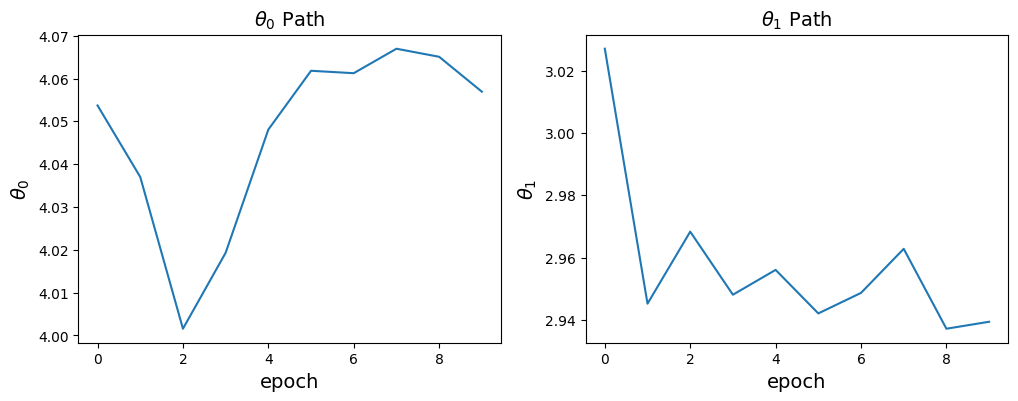

In [45]:
#Plot the Theta changes for each LR
fig, (axs0, axs1) = plt.subplots(1, 2, figsize=(12, 4))
#Plots for Theta 0
axs0.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 0])
axs0.set_title(r'$\theta_0$' + ' Path')
axs0.set_ylabel(r'$\theta_0$')
axs0.set_xlabel('epoch')
#Plots for Theta 1
axs1.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 1])
axs1.set_title(r'$\theta_1$' + ' Path')
axs1.set_ylabel(r'$\theta_1$')
axs1.set_xlabel('epoch')
#Show both
plt.show()

#### Mini Batch Gradient Descent
> Using a LR/Alpha schedule. MORE ON LR schedules later on

1. select n_epochs, minibatch_size, and compute num_batches_per_epoch (ceil(m/minibatch_size)

In [99]:
def learning_schedule(t):
  """
  Time-based function to get alpha change smoothly as iterations happen, this is just one of the ways to do so, like:
  step decay: alpha *= drop rate ^ (t/#_epochs_to_drop)
  exponential decay: alpha *= exp(-kt)
  Adaptative methods like ADAM or RMSprop

  Input t = epoch*m + i
    m = number of examples in X
    i = iteration in the data sample of the epoch

  Output = LR or alpha
  """
  return t0 / (t + t1)

n_epochs = 10
minibatch_size = 20
num_batches_per_epoch = int(np.ceil(m/X_b.shape[0]))

2. select t0, t1 for learning schedule

In [100]:
t0, t1 = 200, 1000  # learning schedule hyperparameters

3. augment data matrix X with a column of 1s (m = number of examples in X)

In [101]:
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance

4. initialize parameter vector theta (intercept and coefficients) to small random numbers


In [102]:
np.random.seed(42)
theta = 0.01 * np.random.randn(X_b.shape[1], 1)  # random initialization
theta_path_mgd = [theta] #To keep track of thetas as they change

5. Loop
- for epoch in range(n_epochs)
  - shuffle X and y
  - for iter in range(num_batches_epoch)
    - select idx = iter * minibatch_size
    - get minibatch: X[idx:idx+minibatch_size] and y[idx:idx+minibatch_size]
    - compute gradient of theta wrt squared error loss function on minibatch    
    - update eta: learning_schedule(epoch*m + iter)            
    - update theta: theta <- theta - eta * gradient

In [103]:
epoch_losses = []
thetas_per_epoch = []
lrs = [] #We are using a different LR per sample/batch, this is to visualize the average LR


for epoch in range(n_epochs): #For each iteration on all batches
    shuffle_idx = np.random.permutation(X_b.shape[0]) #Get random indexes for creating the batches
    X_b_shuffled = X_b[shuffle_idx] #shuffle x data samplesbased on shuffled indexes
    y_shuffled = y[shuffle_idx] #shuffle y labels based on shuffled indexes
    alphas = []
    for i in range(num_batches_per_epoch): #For each mini batch
        start_idx = i * minibatch_size # get the index for the batch size to split data in mini batches
        end_idx = start_idx + minibatch_size
        xi = X_b_shuffled[start_idx:end_idx] #extract a mini batch of the suffled data
        yi = y_shuffled[start_idx:end_idx] #extract a mini batch of the suffled labels
        gradients = 2/minibatch_size  * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        alpha = learning_schedule(epoch * num_batches_per_epoch + i) #Calculate learning rate
        theta = theta - alpha * gradients #Update theta using the same formula as stochastic gradent descent
        alphas.append(alpha)
        theta_path_mgd.append(theta)

    lrs.append(np.mean(alphas))
    thetas_per_epoch.append(theta) #append theta history into the record list
    epoch_loss = ((X_b @ theta - y) ** 2).mean() #Loss function standard version
    epoch_losses.append(float(epoch_loss)) #append loss history into the record list

theta_path_mgd = np.array(theta_path_mgd)
print("Theta using Mini-BGD = ", theta)

Theta using Mini-BGD =  [[3.67750033]
 [3.2634255 ]]


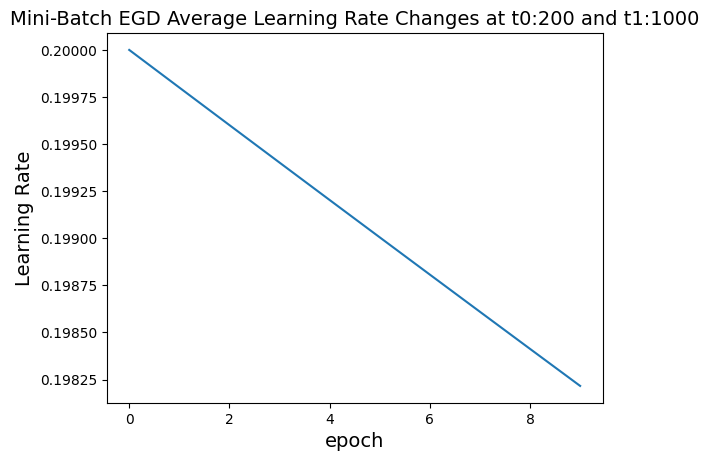

In [104]:
plt.figure()
plt.plot(np.arange(n_epochs), lrs)
plt.title(f'Mini-Batch EGD Average Learning Rate Changes at t0:{t0} and t1:{t1}')
plt.ylabel('Learning Rate')
plt.xlabel('epoch');

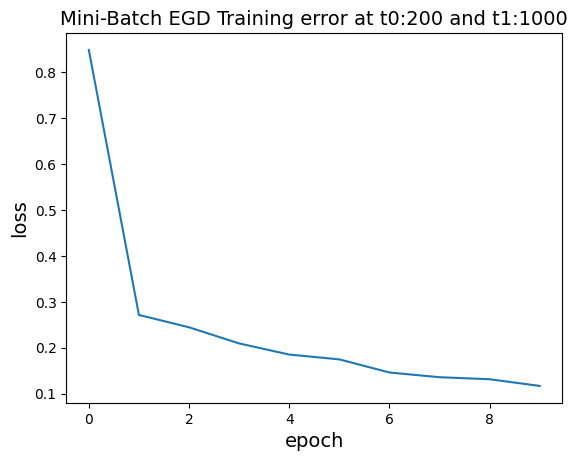

In [105]:
plt.figure()
plt.plot(np.arange(n_epochs), epoch_losses)
plt.title(f'Mini-Batch EGD Training error at t0:{t0} and t1:{t1}')
plt.ylabel('loss')
plt.xlabel('epoch');

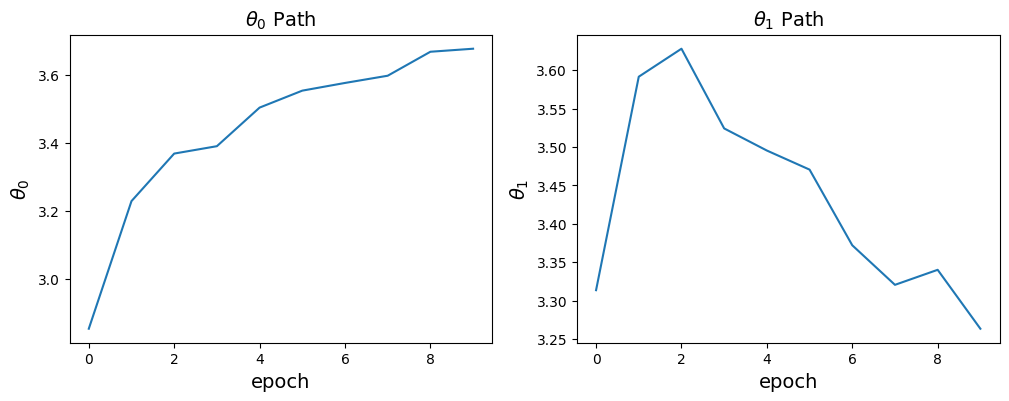

In [106]:
#Plot the Theta changes for each LR
fig, (axs0, axs1) = plt.subplots(1, 2, figsize=(12, 4))
#Plots for Theta 0
axs0.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 0])
axs0.set_title(r'$\theta_0$' + ' Path')
axs0.set_ylabel(r'$\theta_0$')
axs0.set_xlabel('epoch')
#Plots for Theta 1
axs1.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 1])
axs1.set_title(r'$\theta_1$' + ' Path')
axs1.set_ylabel(r'$\theta_1$')
axs1.set_xlabel('epoch')
#Show both
plt.show()

# Comparing Theta Calculation Among Different Gradient Descents

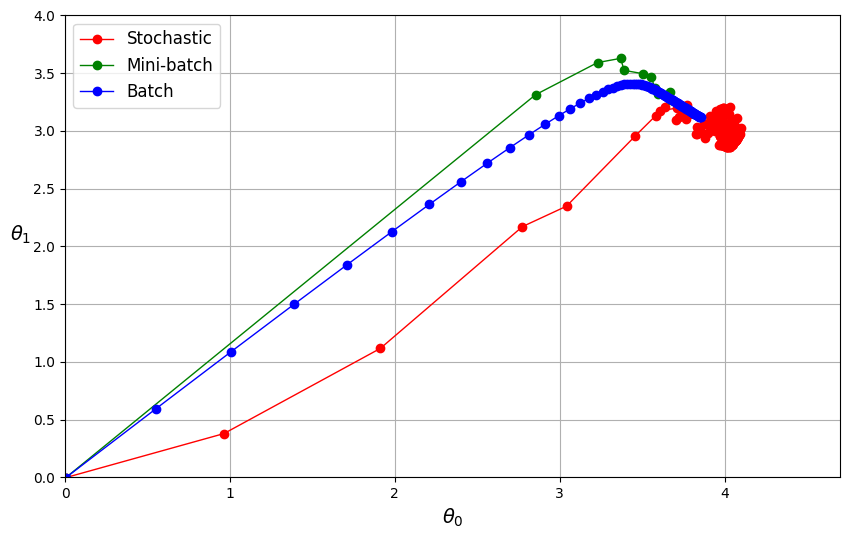

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-o", linewidth=1,
         label="Stochastic")

plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-o", linewidth=1,
         label="Mini-batch")
plt.plot(theta_path[:, 0], theta_path[:, 1], "b-o", linewidth=1,
        label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([0.0, 4.7, 0.0, 4.0])
plt.grid()
plt.legend(loc="upper left");
plt.show()

####